# Homework 4
任课老师：胡俊峰

负责助教：苏亚鲁、李浩然

注意：仅需要提交.ipynb文件，请**不要**将下发压缩包中的其他文件一并交上。

截止日期：3月9日24点

## 第零部分 代码理解
### 0.1 阅读代码预测结果，分析结果是否如预期

In [1]:
testList = ['a', 0, 2]

for entry in testList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        print("The reciprocal of",entry,"is",r)
        break
    except ValueError:
        print("Value Error")
    except (ZeroDivisionError):
        print("ZeroDivision Error")

# 预期：
# The entry is a
# Value Error
# The entry is 0
# ZeroDivision Error
# The entry is 2
# The reciprocal of 2 is 0.5

The entry is a
Value Error
The entry is 0
ZeroDivision Error
The entry is 2
The reciprocal of 2 is 0.5


In [2]:
class Dog(object):

    def __init__(self,name):
        self.name = name

    @property
    def eat(self):
        print(" %s is eating" %self.name)
        return 

d = Dog("Wangchai")

d.eat
d.eat()

# 预期：
# Wangchai is eating
# Wangchai is eating
# 报错：NoneType不能被调用

 Wangchai is eating
 Wangchai is eating


TypeError: 'NoneType' object is not callable

In [3]:
import re   

p = re.compile(r'\d+')             # 匹配1-n个数字
print (p.split('one1two22three3four4'))
print (p.findall('one1two22three3four4'))

# 预期：
# ['one', 'two', 'three', 'four']
# ['1', '22', '3', '4']

['one', 'two', 'three', 'four', '']
['1', '22', '3', '4']


In [4]:
m = re.finditer(r'([a-z]+)','one1;two32 three3,four4') 
print(next(m))
print(next(m))
print(next(m))
print(next(m))

# 预期：
# re.Match object 'one'
# re.Match object 'two' 
# re.Match object 'three' 
# re.Match object 'four'

<re.Match object; span=(0, 3), match='one'>
<re.Match object; span=(5, 8), match='two'>
<re.Match object; span=(11, 16), match='three'>
<re.Match object; span=(18, 22), match='four'>


In [5]:
m = re.finditer(r'([a-z]+)([0-9]+)','one1;two32 three3,four4') 
print(next(m))
print(next(m).group())  # 整个模式
print(next(m).group(1)) # 子模式1
print(next(m).group(2)) # 子模式2

# 预期：
# re.Match object 'one1'
# two32
# three 
# 4

<re.Match object; span=(0, 4), match='one1'>
two32
three
4


### 0.2 Python的私有属性和“受保护的”属性
Python 不能像 Java 那样使用 private 修饰符创建私有属性，但是Python 有个简单的机制，能避免子类意外覆盖“私有”属性。\
举个例子。有人编写了一个名为 Dog 的类，这个类的内部用到了 mood实例属性，但是没有将其开放。现在，你创建了 Dog 类的子类：Beagle。\
如果你在毫不知情的情况下又创建了名为 mood 的实例属性，那么在继承的方法中就会把 Dog 类的 mood 属性覆盖掉。这是个难以调试的问题。\
为了避免这种情况，如果以 __mood 的形式（两个前导下划线，尾部没有或最多有一个下划线）命名实例属性，Python 会把属性名存入实例的__dict__ 属性中，而且会在前面加上一个下划线和类名。因此，对Dog 类来说，__mood 会变成 _Dog__mood；对 Beagle 类来说，会变成_Beagle__mood。这个语言特性叫名称改写（name mangling）。

In [6]:
class Vector2d:
    typecode = 'd'
    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)
    @property
    def x(self): 
        return self.__x
    @property
    def y(self):
        return self.__y
    def __iter__(self):
        return (i for i in (self.x, self.y))

if __name__=='__main__':
    v1 = Vector2d(3, 4)
    print(v1.__dict__)
    print(v1._Vector2d__x)

{'_Vector2d__x': 3.0, '_Vector2d__y': 4.0}
3.0


不是所有 Python 程序员都喜欢名称改写功能，也不是所有人都喜欢self.__x 这种不对称的名称。有些人不喜欢这种句法，他们约定使用一个下划线前缀编写“受保护”的属性（如 self._x）。批评使用两个下划线这种改写机制的人认为，应该使用命名约定来避免意外覆盖属性。
> "绝对不要使用两个前导下划线，这是很烦人的自私行为。如果担心名称冲突，应该明确使用一种名称改写方式（如_MyThing_blahblah）。这其实与使用双下划线一样，不过自己定的规则比双下划线易于理解。" —— Ian Bicking

Python 解释器不会对使用单个下划线的属性名做特殊处理，不过这是很多 Python 程序员严格遵守的约定，他们不会在类外部访问这种属性。
遵守使用一个下划线标记对象的私有属性很容易，就像遵守使用全大写字母编写常量那样容易。
> 不过在**模块**中，顶层名称使用一个前导下划线的话，的确会有影响：对 from mymod import * 来说，mymod 中前缀为下划线的名称不会被导入。然而，依旧可以使用 from mymod import _privatefunc 将其导入。

In [7]:

#单个下划线修饰的“_”的变量、函数、类在使用from xxx import *时都不会被导入
class _Bug(object):  #单个下划线修饰的私有类。
    @staticmethod
    def showbug():
        print("showbug")

Python 文档的某些角落把使用一个下划线前缀标记的属性称为“受保护的”属性。 使用 self._x 这种形式保护属性的做法很常见，但是很少有人把这种属性叫作“受保护的”属性。有些人甚至将其称为“私有”属性。\
总之，python并**不能真正实现**私有和不可变，只有通过**双下滑线内在机制**规避子类对父类属性的覆盖，或者通过遵守**单下划线的人为规定**来实现类的分量的“私有”和类的示例的“不可变”。

## 第一部分 正则表达式(3分)
### 1.1 用正则表达式进行账号、密码、电话、生日判断(2分)
具体格式要求如下：
<br>账号：由英文字母组成，不限大小写。
<br>密码：由英文字母与数字组成且以英文字母开头，最少八位。
<br>电话：11位数字，且以1开头。
<br>生日：年-月-日(YYYY-MM-DD)。

In [8]:
import re
account=""
password=""
telephone=""
birthday=""
#TODO
account = '[A-Za-z]+'
password = '[A-Za-z]\w{7,}'
telephone = '1\d{10,}'
birthday = '((19\d{2})|(20(([01]\d{1})|(2[0-3]))))-((0[1-9])|(1[0-2]))-((0[1-9])|([12]\d)|(3[01]))'
# 仅考虑1900-2023年的日期，未做大小月、闰年等判断
# 即对所有年份和月份，日期取值01-31都将被判定为合法

# print(re.match(account,"PyThoN"))
# print(re.match(password,"Python2022"))
# print(re.match(telephone,"12345678910"))
# print(re.match(birthday,"2022-03-14"))

assert re.match(account,"PyThoN")
assert re.match(password,"Python2022")
assert re.match(telephone,"12345678910")
assert re.match(birthday,"2022-03-14")

### 1.2 邮箱的正则表达式匹配(1分)
要求：邮箱中间须有@，@之前由英文字母、数字、下划线(_)、短横(-)组成，之后由英文字母、数字、下划线(_)、短横(-)、英文句号(.)组成，且必须有至少一个英文句号(.)。

In [9]:
import re

email="[\w\-_]+@[\w\-_]+(.[\w\-_]+)+"
# 额外判断了不能由句点结尾

assert re.match(email,"2-102@pku.edu.cn")

## 第二部分：发布-订阅模式实现（5分）

### 2.1 读取并解析tang300.xml文件，打印前2首诗的内容（即前12行）。编写函数各保存20首李白、杜甫、白居易、王維（維是繁体）的诗，要求为每首诗歌生成独立的数据对象，包括标题、作者、诗内容（按行）的元组（tuple）。(1.5分)
关于xml解析的相关代码，可以参看https://www.runoob.com/python/python-xml.html

In [10]:
'''
可使用xml.dom.minidom来解析xml文件
'''
import xml.dom.minidom
domTree = xml.dom.minidom.parse("tang300.xml")

# 打印前12行内容
print("前两首诗内容：")

collection = domTree.documentElement
poems = collection.getElementsByTagName('作业用唐诗')
t, idx = 0, 0
while idx < len(poems):
    line_num = int(poems[idx].getElementsByTagName('line_number')[0].childNodes[0].data)
    contance = poems[idx].getElementsByTagName('contance')[0].childNodes[0].data
    if line_num == -100:
        t += 1
        if t > 2:
            break
    idx += 1
    print(contance.strip('#').strip('$'))

# get_poems()函数保存20首李白、杜甫、白居易、王維（維是繁体）的诗
def get_poems():
    #TODO
    authors = ['李白', '杜甫', '白居易', '王維']
    nums = {author: 0 for author in authors}
    res = []
    cur_res = []
    for poem in poems:
        line_num = int(poem.getElementsByTagName('line_number')[0].childNodes[0].data)
        if line_num == -100 and cur_res:
            if cur_res[1] in authors:
                if nums[cur_res[1]] < 20:
                    nums[cur_res[1]] += 1
                    res.append(tuple(cur_res))
            cur_res = []
        cur_res.append(poem.getElementsByTagName('contance')[0].childNodes[0].data.strip('#').strip('$'))
    return res 

# ttt = get_poems()
# print(ttt, len(ttt))

前两首诗内容：
餞唐永昌( 一作餞唐郎中洛陽令)
沈佺期
洛陽舊有( 一作出) 神明宰
輦轂由來天地中
餘邑政成何足貴
因君取則四方同
邙山
沈佺期
北邙山上列墳塋
萬古千秋對洛城
城中日夕歌鐘起
山上唯聞松柏聲


### 2.2 实现设计模式中的观察者模式，本部分将以2.1中提取的诗歌信息作为主题。(3.5分)

观察者模式也被称为发布-订阅（Publish/Subscribe）模式。当主题对象状态变化时，会通知所有观察者对象并作出相应处理逻辑。

在本问题中，可以形象地理解成，Publisher为诗歌发布中心，Reader为订阅相应诗人的诗歌的人。需要实现订阅，退订，Publisher可以发布新增、删除诗歌的消息以及当前各位诗人的诗歌的总数。当Publisher发布消息时，它需要把需要推送给所有订阅的Reader。


**Publisher（发布者）**

    - 保存订阅的读者
    - 记录四位诗人各自诗歌的总数
    - 发布四位诗人新诗的消息，每次只需要发布一首
    - 发布新消息时，发布给所有已订阅的读者   
   只有一位发布者Publisher
   
**Reader（订阅者）**

    - 订阅/取消订阅 发布者（注意同一个发布者不要重复订阅）
    - 保存发布者发来的诗歌
关于保存消息，读者分为**两种类型**：
- Type1：保存所有消息，这意味着这类读者需要将四位诗人的诗歌分类。
- Type2：只保存最新的消息（也就是说只需要保存一首诗）。 

要求实例化三个Reader: Alice, Bob, Carol，其中Alice为Type1，Bob&Carol为Type2.

要求Reader实现printStatistics方法来打印保存的诗歌。

要求实现Publisher的__str__方法，输出自己现有的Reader和发出的诗歌数目。

下面给出的代码作为参考，可以不按照下面的参考实现。

#### 参考资料

[1. Observer pattern Wiki](https://en.wikipedia.org/wiki/Observer_pattern)   
[2. 设计模式之观察者模式（c++）](https://www.cnblogs.com/carsonzhu/p/5770253.html)

### 请完成上述Publisher & Reader的代码

In [11]:
class BasePublisher(object):
    def __init__(self,name):
        self.name = name
        self.subscriber = []
        self.poem_cnt = dict()
    def subscribeReader(self, reader):
        self.subscriber.append(reader)

    def unsubscribeReader(self, reader):
        try:
            self.subscriber.remove(reader)    
        except:
            pass

    def notifyReader(self, author, poem):
        for s in self.subscriber:
            s.receivePoem(self, poem, author)
        try:
            self.poem_cnt[author] += 1
        except:
            pass
    def __str__(self):
        res1 = '\n'.join([s.name for s in self.subscriber])
        res2 = '\n'.join([f'{k}:{v}' for k, v in self.poem_cnt.items()])
        return '\n'.join([res1, res2])
        

class _Publisher(BasePublisher):
    def __init__(self,name):
        super().__init__(name)
        authors = ['李白', '杜甫', '白居易', '王維']
        self.poem_cnt = {a: 0 for a in authors}
        
    def notifyReader(self,author,poem):
        super().notifyReader(author, poem)
        

In [12]:
import threading
class BaseReader(object):

    def __init__(self):
        self.saved_poem = []
        self.name = None
        self.publisher = []
    def subscribeToPublisher(self, publisher):
        if publisher not in self.publisher:
            self.publisher.append(publisher)
            publisher.subscribeReader(self)
    def unsubscribeToPublisher(self, publisher):
        try:
            self.publisher.remove(publisher)
            publisher.unsubscribeReader(self)
        except:
            pass
    def __str__(self):
        return self.name
    def receivePoem(self, publisher, poem , author):
        # print('thread id :{}'.format(threading.current_thread().name)) #如果3.2你使用多线程的话请保留此句，
                                                                         #如果使用多进程的话请类似地输出进程id
        pass
    def printStatistics(self):
        # 打印消息
        print(self.saved_poem)

In [13]:
class ReaderType1(BaseReader):

    def __init__(self, _name):
        super().__init__()
        self.name = _name
        self.poems = []
    def receivePoem(self, publisher, poem, author):
        self.poems.append((author, poem))
    def printStatistics(self):
        for p in self.poems:
            print(p)

# 第二种读者
class ReaderType2(BaseReader):

    def __init__(self, _name):
        super().__init__()
        self.name = _name
        self.cur_poem = None

    def receivePoem(self, publisher, poem , author):
        self.cur_poem = (author, poem)

    def printStatistics(self):
        print(self.cur_poem)

In [14]:
Publisher = _Publisher("Publisher")
Alice=ReaderType1('Alice')
Bob=ReaderType2('Bob')
Carol=ReaderType2('Carol')

In [15]:
Alice.subscribeToPublisher(Publisher)
Bob.subscribeToPublisher(Publisher)
## 请在这里利用Publisher任意发出几首诗来测试你的代码
_poems = get_poems()
import random 
s = list(range(len(_poems)))
random.shuffle(s)

for i in s[:20]:
    Publisher.notifyReader(_poems[i][1], _poems[i][0:1]+_poems[i][2:])

In [16]:
print('-----Alice-----')
Alice.printStatistics()
print('------Bob------')
Bob.printStatistics()
print('-----Carol-----')
Carol.printStatistics()
print('---Publisher---')
print(Publisher)

-----Alice-----
('王維', ('輞川集  椒園', '桂尊迎帝子', '杜若贈佳人', '椒漿尊瑤席', '欲下雲中君( 一作身)'))
('李白', ('舍利弗', '金繩界寶地', '珍木蔭瑤池', '雲間妙音奏', '天際法蠡吹'))
('李白', ('別東林寺僧', '東林送客處', '月出白猿啼', '笑別廬山遠', '何煩過虎溪'))
('李白', ('結襪子', '燕南壯士吳門豪', '築中置鉛魚隱刀', '感君恩重許君命', '太山一擲輕鴻毛'))
('白居易', ('出關路', '山川函穀路', '塵土遊子顏', '蕭條去國意', '秋風生故關'))
('王維', ('輞川集  斤竹嶺', '檀欒映空曲', '青翠漾漣漪', '暗入商人路', '樵人不可知'))
('杜甫', ('又於韋處乞大邑瓷碗', '大邑燒瓷輕且堅', '扣如哀( 一作寒) 玉錦城傳', '君家白碗勝霜雪', '急送茅齋也可憐'))
('李白', ('巴陵贈賈舍人', '賈生西望憶京華', '湘浦南遷莫怨嗟', '聖主恩深漢文帝', '憐君不遣到長沙'))
('杜甫', ('王錄事許修草堂貲不到聊小詰', '為嗔王錄事', '不寄草堂貲', '昨屬愁春雨', '能忘欲漏時'))
('李白', ('高句驪', '金花折風帽', '白馬小遲迴', '翩翩舞廣袖', '似鳥海東來'))
('白居易', ('禁中', '門嚴九重靜', '窗幽一室閒', '好是修心處', '何必在深山'))
('王維', ('皇甫嶽雲溪雜題五首  蓮花塢', '日日采蓮去', '洲長多暮歸', '弄篙莫濺水', '畏溼紅蓮衣'))
('杜甫', ('李司馬橋了( 一作成) 承( 一本無承字) 高使君自成都回', '向來江上手紛紛', '三日成功事出群', '已傳童子騎青竹( 一作馬)', '總擬橋東待使君'))
('李白', ('題情深樹寄象公', '腸斷枝上猿', '淚添山下樽', '白雲見我去', '亦為我飛翻'))
('王維', ('輞川集  白石灘', '清淺白石灘', '綠蒲向堪把', '家住水東西', '浣紗明月下'))
('王維', ('輞川集  漆園', '古人非傲吏', '自闕經世務', '偶寄一微官', '婆娑數株樹'))
('杜甫', ('因崔五侍御寄高彭州  

In [17]:
Carol.subscribeToPublisher(Publisher)
Bob.unsubscribeToPublisher(Publisher)
##再任意发出几首诗进行测试
for i in s[20:25]:
    Publisher.notifyReader(_poems[i][1], _poems[i][0:1]+_poems[i][2:])

In [18]:
print('-----Alice-----')
Alice.printStatistics()
print('------Bob------')
Bob.printStatistics()
# 未删除取消订阅者所存储的数据
print('-----Carol-----')
Carol.printStatistics()
print('---Publisher---')
print(Publisher)

-----Alice-----
('王維', ('輞川集  椒園', '桂尊迎帝子', '杜若贈佳人', '椒漿尊瑤席', '欲下雲中君( 一作身)'))
('李白', ('舍利弗', '金繩界寶地', '珍木蔭瑤池', '雲間妙音奏', '天際法蠡吹'))
('李白', ('別東林寺僧', '東林送客處', '月出白猿啼', '笑別廬山遠', '何煩過虎溪'))
('李白', ('結襪子', '燕南壯士吳門豪', '築中置鉛魚隱刀', '感君恩重許君命', '太山一擲輕鴻毛'))
('白居易', ('出關路', '山川函穀路', '塵土遊子顏', '蕭條去國意', '秋風生故關'))
('王維', ('輞川集  斤竹嶺', '檀欒映空曲', '青翠漾漣漪', '暗入商人路', '樵人不可知'))
('杜甫', ('又於韋處乞大邑瓷碗', '大邑燒瓷輕且堅', '扣如哀( 一作寒) 玉錦城傳', '君家白碗勝霜雪', '急送茅齋也可憐'))
('李白', ('巴陵贈賈舍人', '賈生西望憶京華', '湘浦南遷莫怨嗟', '聖主恩深漢文帝', '憐君不遣到長沙'))
('杜甫', ('王錄事許修草堂貲不到聊小詰', '為嗔王錄事', '不寄草堂貲', '昨屬愁春雨', '能忘欲漏時'))
('李白', ('高句驪', '金花折風帽', '白馬小遲迴', '翩翩舞廣袖', '似鳥海東來'))
('白居易', ('禁中', '門嚴九重靜', '窗幽一室閒', '好是修心處', '何必在深山'))
('王維', ('皇甫嶽雲溪雜題五首  蓮花塢', '日日采蓮去', '洲長多暮歸', '弄篙莫濺水', '畏溼紅蓮衣'))
('杜甫', ('李司馬橋了( 一作成) 承( 一本無承字) 高使君自成都回', '向來江上手紛紛', '三日成功事出群', '已傳童子騎青竹( 一作馬)', '總擬橋東待使君'))
('李白', ('題情深樹寄象公', '腸斷枝上猿', '淚添山下樽', '白雲見我去', '亦為我飛翻'))
('王維', ('輞川集  白石灘', '清淺白石灘', '綠蒲向堪把', '家住水東西', '浣紗明月下'))
('王維', ('輞川集  漆園', '古人非傲吏', '自闕經世務', '偶寄一微官', '婆娑數株樹'))
('杜甫', ('因崔五侍御寄高彭州  

## 第三部分：文本处理（2分）
文件results.xls是从ChinaDaily娱乐板块的若干子页面上爬取并保存到excel中的内容。请同学们从excel文件中读出爬取的内容，调用jieba进行分词，统计词频并生成词云图。

### 3.1 读取results.xls文件内容，按照注释中函数说明的要求实现文件读取函数。(2分)

In [19]:
import xlrd

# 读取文件
def read_from_excel(filename):
    """
    函数说明：将excel文件中的数据读取到list中，相当于write_to_excel()的逆过程
    注：读取excel的每行内容后，先把第一行的字段名提取出来，后面再按这些字段构建字典索引

    Parameters:
        filename: 待读取的excel文件路径

    Returns:
        result_list: 一个包含网页数据对象的list
    """
    # TODO
    res = []
    wb = xlrd.open_workbook(filename).sheet_by_index(0)
    hd = wb.row_values(0)
    for i in range(1, wb.nrows):
        res.append(dict(zip(hd, wb.row_values(i))))
    return res

# 测试
if __name__ =='__main__':
    filename = "./results.xls"
    loaded_data = read_from_excel(filename)

    assert loaded_data[0]['标题'] == '《明星大侦探4》白敬亭自称“不加糖也很甜”\n'
    assert loaded_data[1]['来源'] == '环球网综合'


### 3.2 根据3.1中读取的数据，过滤特殊符号并统计数据中的高频词，最终生成词云图（选做+2分）

2023-03-08 11:56:24,710 - 1660814115.py[line:124] - INFO: 开始统计词频并生成词云分布...
Building prefix dict from the default dictionary ...
2023-03-08 11:56:24,710 - __init__.py[line:113] - DEBUG: Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\huawei\AppData\Local\Temp\jieba.cache
2023-03-08 11:56:24,718 - __init__.py[line:133] - DEBUG: Loading model from cache C:\Users\huawei\AppData\Local\Temp\jieba.cache
Loading model cost 1.046 seconds.
2023-03-08 11:56:25,764 - __init__.py[line:165] - DEBUG: Loading model cost 1.046 seconds.
Prefix dict has been built successfully.
2023-03-08 11:56:25,764 - __init__.py[line:166] - DEBUG: Prefix dict has been built successfully.


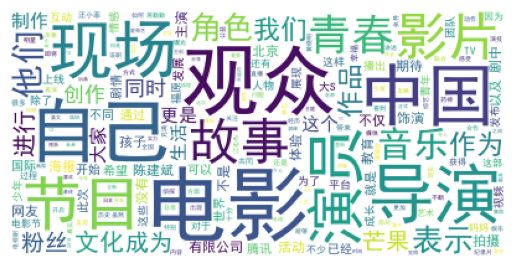

2023-03-08 11:56:27,969 - 1660814115.py[line:126] - INFO: 词云图生成并保存成功!
2023-03-08 11:56:27,977 - 1660814115.py[line:127] - INFO: 
2023-03-08 11:56:27,985 - 1660814115.py[line:128] - INFO: 选做部分执行完成! Congratulations!


In [20]:
import requests  # 发送网络请求
from bs4 import BeautifulSoup  # 解析html
from datetime import datetime  # 格式化显示时间
from tqdm import tqdm  # 可视化显示进度条
import xlrd  # 读取excel
import xlwt  # 写入excel
import os  # 显示文件路径

import jieba  # 分词
import numpy as np  # 用于生成词云时处理图像
from PIL import Image, ImageSequence  # 用于生成词云时处理图像
import matplotlib.pyplot as plt  # 用于画图
from wordcloud import WordCloud, ImageColorGenerator  # 生成词云
import pdb  # 用于打断点调试
import logging  # 打印日志信息


# 设置日志级别
logging.basicConfig(level=logging.INFO,
format='%(asctime)s - %(filename)s[line:%(lineno)d] - %(levelname)s: %(message)s')


"""
    进阶任务目标：从excel文件中读出爬取的内容，调用jieba进行分词，统计词频并生成词云图。
    进阶任务目标的执行流程已经被封装到work_optional()函数中。其中调用的部分函数功能需要大家自行实现。
"""

def merge_dict(dict1, dict2):
    """
    函数说明：将dict2中的内容合并到dict1中，key不存在则新建，key存在则value相加

    Parameters:
        dict1: 字典1
        dict2: 字典2

    Returns:
        dict1: 将字典2中的内容合并到字典1中
    """
    for k in dict2:
        if k in dict1:
            dict1[k] += dict2[k]
        else:
            dict1[k] = dict2[k]
    return dict1


# (选做部分)
def get_word_freq_dict_from_text(text):
    """
    函数说明：输入一段文本，输出这段文本中长度>=2的词的词频统计字典（去掉了特殊符号，以及长度为1的单个字）

    Parameters:
        text: 一个字符串，代表输入文本

    Returns:
        word_freq_dict: 统计了主要词出现次数的词频字典
    """
    useless_str = '''一！“”，。？、；’"',.、·《》()#\t：\n'''
    word_freq_dict = {}
    # TODO
    text = ''.join([i if i not in useless_str else ' ' for i in text]).split(' ')
    words = []
    for t in text:
        words += jieba.lcut(t)
    
    for word in words:
        if len(word) == 1:
            continue
        word_freq_dict[word] = word_freq_dict.get(word, 0) + 1
    return word_freq_dict


def get_word_frequency_dict(result_list):
    """
    函数说明：给定一个数据列表（可以是全部或切片），统计其中所有“正文内容”字段汇总后的词频分布
            相当于对get_word_freq_dict_from_text()函数的封装

    Parameters:
        result_list: 爬取并解析后的网页内容数据

    Returns:
        word_frequency_dict: 统计了主要词出现次数的词频字典
    """
    word_frequency_dict = {}
    for data in result_list:
        current_freq_dict = get_word_freq_dict_from_text(data["正文内容"])
        word_frequency_dict = merge_dict(word_frequency_dict, current_freq_dict)
    return word_frequency_dict


# (选做部分)
def generate_word_cloud(result_list):
    """
    函数说明：根据过滤不常用词后的词频统计字典，调用wordcloud包生成词云图

    Parameters:
        dict_list: 词频字典

    Returns:
        无
    """
    # TODO
    word_freq_dict = get_word_frequency_dict(result_list)
    font = r'c:\Windows\Fonts\simhei.ttf'
    wc = WordCloud(font_path=font, background_color='white').generate_from_frequencies(word_freq_dict)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

def work_optional():
    """
    函数说明：
        执行 生成词云 流程

    Parameters:
        无

    Returns:
        无
    """
    filename = "./results.xls"
    loaded_data = read_from_excel(filename)
    
    logging.info(f"开始统计词频并生成词云分布...")
    generate_word_cloud(loaded_data)
    logging.info(f"词云图生成并保存成功!")
    logging.info(f"")
    logging.info(f"选做部分执行完成! Congratulations!")
    return
    
if __name__ == '__main__':
    work_optional()  # 运行进阶要求部分代码